# Convolutional Neural Network (CNN)

## Data Preprocessing

In [102]:
# Imports
import os
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.python.keras import utils
from keras.utils import to_categorical

In [2]:
def extract_mel_spectrogram(directory):
    
    # Creating empty lists for mel spectrograms and labels
    labels = []
    mel_specs = []
    
    
    # Looping through each file in the directory
    for file in os.scandir(directory):
        
        # Loading in the audio file
        y, sr = librosa.core.load(file)
        
        # Extracting the label and adding it to the list
        label = str(file).split('.')[0][11:]
        labels.append(label)
        
        # Computing the mel spectrograms
        spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
        spect = librosa.power_to_db(spect, ref=np.max)
        
        # Adjusting the size to be 128 x 660
        if spect.shape[1] != 660:
            spect.resize(128,660, refcheck=False)
            
        # Adding the mel spectrogram to the list
        mel_specs.append(spect)
        
    # Converting the list or arrays to an array
    X = np.array(mel_specs)
    
    # Converting labels to numeric values
    labels = pd.Series(labels)
    label_dict = {
        'jazz': 0,
        'reggae': 1,
        'rock': 2,
        'blues': 3,
        'hiphop': 4,
        'country': 5,
        'metal': 6,
        'classical': 7,
        'disco': 8,
        'pop': 9
    }
    y = labels.map(label_dict).values
    
    # Returning the mel spectrograms and labels
    return X, y

In [3]:
# Using the function to read and extract mel spectrograms from the GTZAN Genre Dataset audio files
X, y = extract_mel_spectrogram('../data/wavfiles')

In [129]:
y.shape

(1000,)

In [5]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [6]:
# Checking the minimum value (the scale ranges from zero to some negative value) to see how we should scale the data
X_train.min()

-80.0

In [7]:
# Scaling our data to be between 0 and 1
X_train /= -80
X_test /= -80

In [8]:
# Reshaping images to be 128 x 660 x 1
X_train = X_train.reshape(X_train.shape[0], 128, 660, 1)
X_test = X_test.reshape(X_test.shape[0], 128, 660, 1)

In [9]:
# One hot encoding our labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## Constructing a Feed Forward Neural Network

In [87]:
# Initiating an empty neural network
model = Sequential()

# Adding a flattened layer to input our image data
model.add(Flatten(input_shape = (128, 660, 1)))

# Adding a dense layer with 256 neurons
model.add(Dense(256, activation='relu'))

# Adding a dense layer with 128 neurons
model.add(Dense(128, activation='relu'))

# Adding an output layer
model.add(Dense(10, activation='softmax'))

# Compiling our neural network
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Fitting our neural network
history = model.fit(X_train,
                    y_train, 
                    batch_size=16,
                    validation_data=(X_test, y_test),
                    epochs=20)

Train on 750 samples, validate on 250 samples
Epoch 1/20
750/750 [==============================] - 4s 5ms/sample - loss: 26.1158 - accuracy: 0.1280 - val_loss: 9.4414 - val_accuracy: 0.1000
Epoch 2/20
750/750 [==============================] - 3s 4ms/sample - loss: 6.4382 - accuracy: 0.1707 - val_loss: 4.0094 - val_accuracy: 0.2560
Epoch 3/20
750/750 [==============================] - 3s 4ms/sample - loss: 3.9856 - accuracy: 0.2560 - val_loss: 2.7415 - val_accuracy: 0.2800
Epoch 4/20
750/750 [==============================] - 3s 5ms/sample - loss: 2.5346 - accuracy: 0.3320 - val_loss: 3.0169 - val_accuracy: 0.2320
Epoch 5/20
750/750 [==============================] - 4s 5ms/sample - loss: 2.8666 - accuracy: 0.3480 - val_loss: 2.5169 - val_accuracy: 0.3160
Epoch 6/20
750/750 [==============================] - 3s 5ms/sample - loss: 2.3356 - accuracy: 0.3480 - val_loss: 1.9115 - val_accuracy: 0.3720
Epoch 7/20
750/750 [==============================] - 3s 4ms/sample - loss: 1.9139 - accu

## Constructing a CNN

In [130]:
# Initiating an empty neural network
cnn_model = Sequential(name='cnn_1')

# Adding convolutional layer
cnn_model.add(Conv2D(filters=8,
                     kernel_size=(5,5),
                     padding='same',
                     activation='relu',
                     input_shape=(128,660,1)))

# Adding max pooling layer
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

# Adding convolutional layer
cnn_model.add(Conv2D(16,
                     kernel_size=(5,5),
                     padding='same',
                     activation='relu'))

# Adding max pooling layer
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

# Adding a flattened layer to input our image data
cnn_model.add(Flatten())
              
# Adding a dense layer with 256 neurons
cnn_model.add(Dense(256, activation='relu'))

# Adding a dropout layer for regularization
cnn_model.add(Dropout(0.5))

# Adding a dense layer with 64 neurons
cnn_model.add(Dense(64, activation='relu'))

# Adding a dropout layer for regularization
cnn_model.add(Dropout(0.5))

# Adding an output layer
cnn_model.add(Dense(10, activation='softmax'))

# Compiling our neural network
cnn_model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

# Fitting our neural network
history = cnn_model.fit(X_train,
                        y_train, 
                        batch_size=16,
                        validation_data=(X_test, y_test),
                        epochs=30)

Train on 750 samples, validate on 250 samples
Epoch 1/30
750/750 [==============================] - 20s 27ms/sample - loss: 2.7891 - accuracy: 0.0760 - val_loss: 2.3025 - val_accuracy: 0.1040
Epoch 2/30
750/750 [==============================] - 21s 28ms/sample - loss: 2.3001 - accuracy: 0.1120 - val_loss: 2.2958 - val_accuracy: 0.0840
Epoch 3/30
750/750 [==============================] - 19s 26ms/sample - loss: 2.2876 - accuracy: 0.1360 - val_loss: 2.2808 - val_accuracy: 0.1000
Epoch 4/30
750/750 [==============================] - 19s 25ms/sample - loss: 2.2638 - accuracy: 0.1200 - val_loss: 2.2410 - val_accuracy: 0.1120
Epoch 5/30
750/750 [==============================] - 18s 25ms/sample - loss: 2.2172 - accuracy: 0.1800 - val_loss: 2.1586 - val_accuracy: 0.1800
Epoch 6/30
750/750 [==============================] - 18s 25ms/sample - loss: 2.1420 - accuracy: 0.2013 - val_loss: 2.0408 - val_accuracy: 0.2160
Epoch 7/30
750/750 [==============================] - 19s 25ms/sample - loss: 

In [17]:
# Checking the model summary
cnn_model.summary()

Model: "cnn_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 660, 16)      160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 330, 16)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 330, 32)       4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 165, 32)       0         
_________________________________________________________________
flatten (Flatten)            (None, 168960)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               43254016  
_________________________________________________________________
dropout (Dropout)            (None, 256)               0     

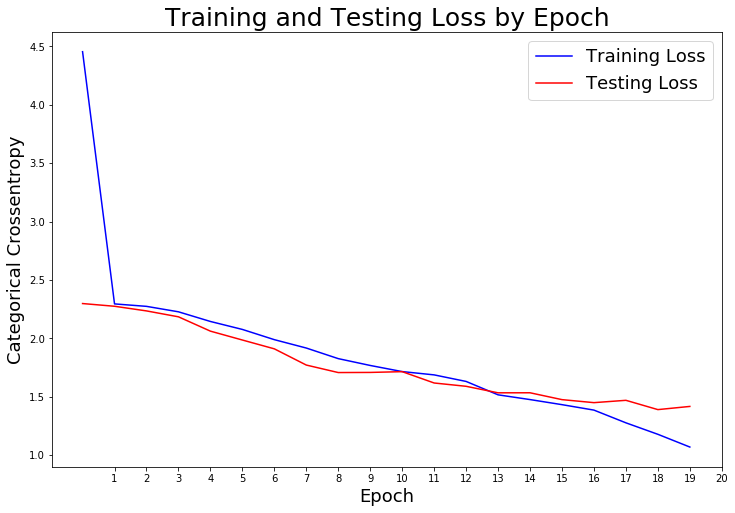

In [13]:
# The code in this cell was adapted from a lecture at General Assembly

# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(test_loss, label='Testing Loss', color='red')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(range(1,21), range(1,21))

plt.legend(fontsize = 18);

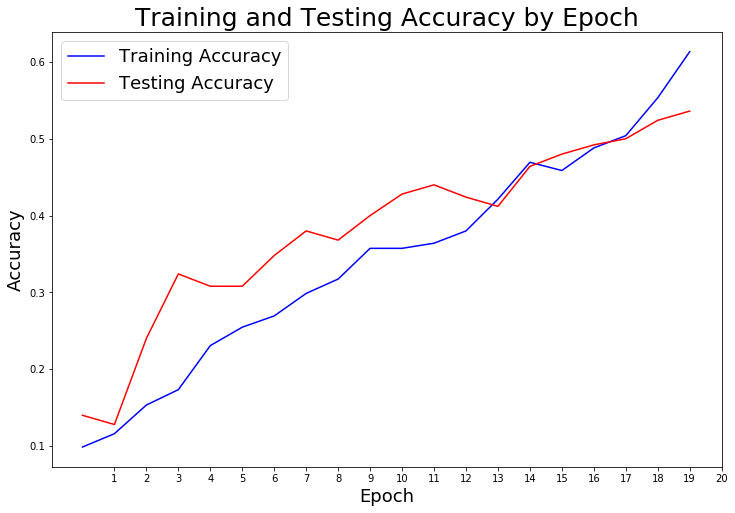

In [14]:
# The code in this cell was adapted from a lecture at General Assembly

# Check out our train accuracy and test accuracy over epochs.
train_loss = history.history['accuracy']
test_loss = history.history['val_accuracy']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Accuracy', color='blue')
plt.plot(test_loss, label='Testing Accuracy', color='red')

# Set title
plt.title('Training and Testing Accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Accuracy', fontsize = 18)
plt.xticks(range(1,21), range(1,21))

plt.legend(fontsize = 18);

In [20]:
# Making predictions from the cnn model
predictions = cnn_model.predict(X_test, verbose=1)

250/250 [==============================] - 1s 6ms/sample


In [88]:
# Checking the number of targets per class
for i in range(10): 
    print(f'{i}: {sum([1 for target in y_test if target[i] == 1])}')

0: 25
1: 25
2: 25
3: 25
4: 25
5: 25
6: 25
7: 25
8: 25
9: 25


In [89]:
# Checking the number of predicted values in each class
for i in range(10): 
    print(f'{i}: {sum([1 for prediction in predictions if np.argmax(prediction) == i])}')

0: 23
1: 34
2: 19
3: 6
4: 23
5: 45
6: 34
7: 34
8: 11
9: 21


In [124]:
# Calculating the confusion matrix 
# row: actual
# columns: predicted
confusion_matrix = confusion_matrix(np.argmax(y_test, 1), np.argmax(predictions, 1))
confusion_matrix

array([[11,  1,  1,  0,  0,  4,  0,  7,  0,  1],
       [ 2, 18,  0,  0,  1,  2,  0,  0,  1,  1],
       [ 0,  2,  7,  2,  3,  5,  1,  2,  2,  1],
       [ 7,  2,  4,  3,  0,  5,  0,  3,  1,  0],
       [ 0,  5,  3,  1, 13,  0,  3,  0,  0,  0],
       [ 1,  1,  2,  0,  0, 19,  0,  1,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 24,  0,  1,  0],
       [ 1,  0,  0,  0,  0,  4,  0, 19,  1,  0],
       [ 1,  2,  2,  0,  5,  2,  6,  0,  5,  2],
       [ 0,  3,  0,  0,  1,  4,  0,  2,  0, 15]])

In [125]:
# Creating a dataframe of the confusion matrix with labels for readability 
confusion_df = pd.DataFrame(confusion_matrix)
confusion_df

,0,1,2,3,4,5,6,7,8,9
0,11,1,1,0,0,4,0,7,0,1
1,2,18,0,0,1,2,0,0,1,1
2,0,2,7,2,3,5,1,2,2,1
3,7,2,4,3,0,5,0,3,1,0
4,0,5,3,1,13,0,3,0,0,0
5,1,1,2,0,0,19,0,1,0,1
6,0,0,0,0,0,0,24,0,1,0
7,1,0,0,0,0,4,0,19,1,0
8,1,2,2,0,5,2,6,0,5,2
9,0,3,0,0,1,4,0,2,0,15


In [126]:
# Creating a dictionary of labels
labels_dict = {
    0: 'jazz',
    1: 'reggae',
    2: 'rock',
    3: 'blues',
    4: 'hiphop',
    5: 'country',
    6: 'metal',
    7: 'classical',
    8: 'disco',
    9: 'pop'
}

In [127]:
# Renaming rows and columns with labes
confusion_df = confusion_df.rename(columns=labels_dict)
confusion_df.index = confusion_df.columns
confusion_df

,jazz,reggae,rock,blues,hiphop,country,metal,classical,disco,pop
jazz,11,1,1,0,0,4,0,7,0,1
reggae,2,18,0,0,1,2,0,0,1,1
rock,0,2,7,2,3,5,1,2,2,1
blues,7,2,4,3,0,5,0,3,1,0
hiphop,0,5,3,1,13,0,3,0,0,0
country,1,1,2,0,0,19,0,1,0,1
metal,0,0,0,0,0,0,24,0,1,0
classical,1,0,0,0,0,4,0,19,1,0
disco,1,2,2,0,5,2,6,0,5,2
pop,0,3,0,0,1,4,0,2,0,15
